In [2]:
%pip install seaborn


You should consider upgrading via the 'C:\Users\prasa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



     ------------------------------------ 294.9/294.9 KB 100.1 kB/s eta 0:00:00


In [3]:

import numpy as py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as F
import seaborn as sns


In [4]:
df = pd.read_csv('/Users/prasa/Downloads/AI Financial Market Data.csv')
OpenAI = df[df['Company'] == 'OpenAI']
Google = df[df['Company'] == 'Google']
Meta = df[df['Company'] == 'Meta']
Company_list = [OpenAI, Google, Meta]

In [5]:
O_stats = OpenAI.describe()
G_stats = Google.describe()
M_stats = Meta.describe()
C = [O_stats, G_stats, M_stats]
RD_S = []
AI_G = []
RD_Spend = {}
AI_Max = {}
for data in Company_list:
    x = (data["R&D_Spending_USD_Mn"].sum())
    RD_S.append(x)
    y = (data["AI_Revenue_Growth_%"].sum())
    AI_G.append(y)
    
    
RD_Spend[RD_S[0]] = 'OpenAI'
RD_Spend[RD_S[1]] = 'Google'
RD_Spend[RD_S[2]] = 'Meta'
AI_Max[AI_G[0]] = 'OpenAI'
AI_Max[AI_G[1]] = 'Google'
AI_Max[AI_G[2]] = 'Meta'

In [6]:
Company_stats_list = []
for data in C:
    data=data.drop(index =['min', 'std', 'count', '25%', '75%'])
    data=data.rename(index = {"50%": "median"})
    Company_stats_list.append(data)
print(Company_stats_list)
print("Maximum amount in R&D was spent by: "+ RD_Spend[max(RD_S)]
    + " and the company that grew the fastest with the help of AI was "+ AI_Max[max(AI_G)]) 

[        R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  AI_Revenue_Growth_%  \
mean               7.249595           2.590443           159.043427   
median             7.150000           2.330000           133.340000   
max               14.430000           6.650000           565.500000   

        Stock_Impact_%  
mean          0.040709  
median        0.010000  
max          18.500000  ,         R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  AI_Revenue_Growth_%  \
mean             115.888623           77.88075           159.602313   
median           114.500000           73.21000           144.030000   
max              163.830000          155.96000           419.880000   

        Stock_Impact_%  
mean          0.026209  
median        0.020000  
max           6.200000  ,         R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  AI_Revenue_Growth_%  \
mean              72.415294          51.908519           159.542223   
median            70.960000          48.550000           142.770000   
max           

In [7]:
t1 = (OpenAI["R&D_Spending_USD_Mn"].corr(OpenAI["AI_Revenue_USD_Mn"]))
t2 = (OpenAI["R&D_Spending_USD_Mn"].corr(OpenAI["Stock_Impact_%"]))
t3 = (OpenAI["Stock_Impact_%"].corr(OpenAI["AI_Revenue_USD_Mn"]))
t4 = (Google["R&D_Spending_USD_Mn"].corr(Google["AI_Revenue_USD_Mn"]))
t5 = (Google["R&D_Spending_USD_Mn"].corr(Google["Stock_Impact_%"]))
t6 = (Google["Stock_Impact_%"].corr(Google["AI_Revenue_USD_Mn"]))
t7 = (Meta["R&D_Spending_USD_Mn"].corr(Meta["AI_Revenue_USD_Mn"]))
t8 = (Meta["R&D_Spending_USD_Mn"].corr(Meta["Stock_Impact_%"]))
t9 = (Meta["Stock_Impact_%"].corr(Meta["AI_Revenue_USD_Mn"]))
d = {
    
    'Company' : ['OpenAI', 'Google', 'Meta'],
    'R&D vs AI Revenue' : [t1, t4, t7],
    'R&D vs Stock Impact' : [t2, t5, t8],
    'AI Revenue vs Stock Impact' : [t3, t6, t9]
    
}
dfr = pd.DataFrame(data = d)
print(dfr)
dfr = dfr.drop(columns = ["Company"])

  Company  R&D vs AI Revenue  R&D vs Stock Impact  AI Revenue vs Stock Impact
0  OpenAI           0.779190             0.017889                    0.027638
1  Google           0.991085             0.009791                    0.009070
2    Meta           0.989564             0.023232                    0.024150


In [8]:
sum=0
count = 0
x = []
y= []
for data in OpenAI['AI_Revenue_USD_Mn']:
    sum += data
    x.append(sum)
    y.append(count)
    count+=1
print(sum)
sum1=0
count1 = 0
x1 = []
y1= []
for data in Google['AI_Revenue_USD_Mn']:
    sum1 += data
    x1.append(sum1)
    y1.append(count1)
    count1+=1

sum2=0
count2 = 0
x2 = []
y2= []
for data in Meta['AI_Revenue_USD_Mn']:
    sum2 += data
    x2.append(sum2)
    y2.append(count2)
    count2+=1

9462.890000000007


In [9]:
event = df.dropna(subset=["Event"])
e_best = event.nlargest(2, "Stock_Impact_%")[["Event", "Company", "Stock_Impact_%"]]
e_worst = event.nsmallest(2, "Stock_Impact_%")[["Event", "Company", "Stock_Impact_%"]]
print(e_best, e_worst)

                          Event Company  Stock_Impact_%
3408  GPT-5 release (predicted)  OpenAI            18.5
2994              GPT-4 release  OpenAI            15.2                              Event Company  Stock_Impact_%
3350   AI Ads Optimization upgrade  OpenAI           -3.00
10785      AI ethics policy update    Meta           -2.99


C:\Users\prasa\AppData\Local\Temp\ipykernel_16360\3068599966.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


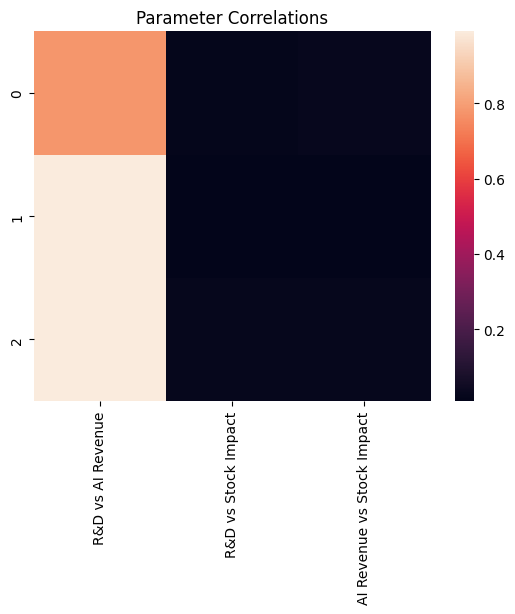

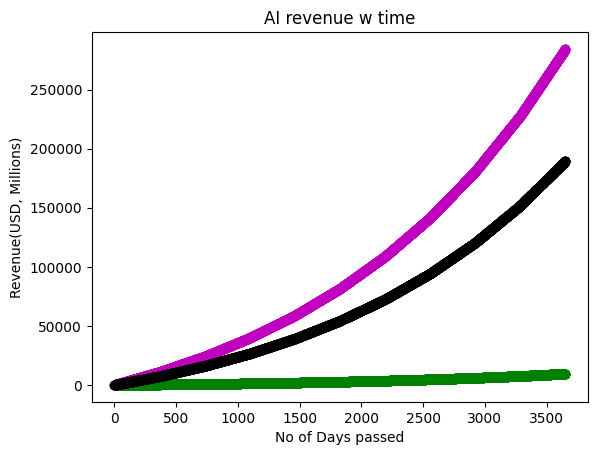

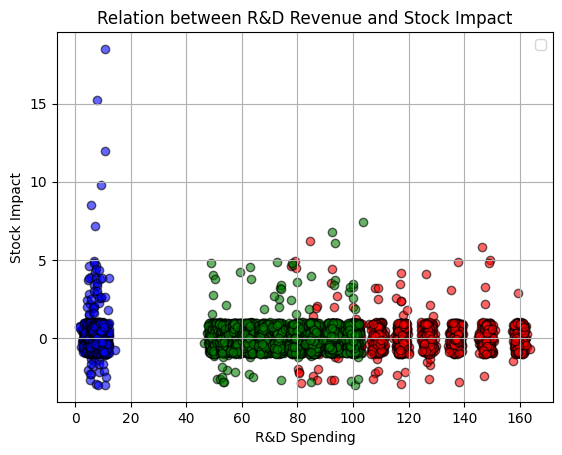

In [10]:
plt.figure("Heatmap")      
sns.heatmap(dfr, annot=False,)
plt.title("Parameter Correlations")    
    
    
plt.figure("Line Graph")
plt.plot(y, x, "g", marker="o",   label="OpenAI")  
plt.plot(y1, x1, "m", marker="o",  label="Google") 
plt.plot(y2, x2,"k",  marker="o",  label="Meta") 
plt.title("AI revenue w time")
plt.ylabel("Revenue(USD, Millions)")
plt.xlabel("No of Days passed")

plt.figure("Scatterplot")
plt.scatter(OpenAI["R&D_Spending_USD_Mn"], OpenAI["Stock_Impact_%"], 
            color="blue", alpha=0.6, edgecolor="k")
plt.scatter(Google["R&D_Spending_USD_Mn"], Google["Stock_Impact_%"], 
            color="red", alpha=0.6, edgecolor="k")
plt.scatter(Meta["R&D_Spending_USD_Mn"], Meta["Stock_Impact_%"], 
            color="green", alpha=0.6, edgecolor="k")
plt.title("Relation between R&D Revenue and Stock Impact")
plt.xlabel("R&D Spending")
plt.ylabel("Stock Impact")


plt.legend()
plt.grid(True)
plt.show()